# ***ImageNet and Using Pretrained Models***

1. ImageNet contains more than 14 million images which belong to more than 20,000 classes ( or synsets ). They also provide bounding box annotations for around 1 million images, which can be used in Object Localization tasks.

2. A pre-trained model is trained on a different task than the task at hand but provides a very useful starting point because the features learned while training on the old task are useful for the new task.

3. The problem is that it is difficult to get such huge labeled datasets for training the network.

4. Another problem, related to deep networks is that even if you get the data, it takes a large amount of time to train the network ( hundreds of hours ). Thus, it takes a lot of time, money and effort to train a deep network successfully.

5. Fortunately, we can leverage the models already trained on very large amounts of data for difficult tasks with thousands of classes.

## ***Loading ImageNet1000 Class Labels***

In [2]:
import pickle
from urllib.request import urlopen
class_labels = pickle.load(urlopen('https://gist.githubusercontent.com/yrevar/6135f1bd8dcf2e0cc683/raw/d133d61a09d7e5a3b36b8c111a8dd5c4b5d560ee/imagenet1000_clsid_to_human.pkl'))

In [3]:
len(class_labels)

print(class_labels[2])

great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias


# ***Import Necessary Libraries***

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# ***Import Pretrained Models for Classification***

In [2]:
from tensorflow.keras.applications import (vgg16, resnet50, mobilenet, inception_v3)

# initialize the weights of the model with ImageNet weights

vgg_model = vgg16.VGG16(weights='imagenet')
inception_model = inception_v3.InceptionV3(weights='imagenet')
resnet_model = resnet50.ResNet50(weights='imagenet')
mobilenet_model = mobilenet.MobileNet(weights='imagenet')

17227776/17225924 [==============================] - 1s 0us/step


# ***Load and PreProcess Image***

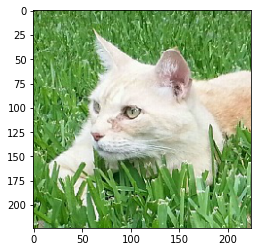

PIL Image Size: (224, 224)
Numpy Image Size: (224, 224, 3)
Image Batch Size: (1, 224, 224, 3)


In [5]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import decode_predictions
# import cv2
# from google.colab.patches import cv2_imshow
# from skimage import io

filename = '/content/cat.jpg'
filename2 = '/content/Siam_lilacpoint.jpg'

# original_image = io.imread(filename)
# cv2_imshow(original_image)

# Car Species 1
#load image in PIL format 
original_image = load_img(filename, target_size=(224,224,3))
plt.imshow(original_image)
plt.show()
print('PIL Image Size: {}'.format(original_image.size))

# convert PIL Image to numpy array
numpy_image = img_to_array(original_image)
print('Numpy Image Size: {}'.format(numpy_image.shape))

# convert image to batch format by expanding dims at axis=0
image_batch = np.expand_dims(numpy_image, axis=0)
print('Image Batch Size: {}'.format(image_batch.shape))

PIL Image2 Size: (224, 224)
Numpy Image2 Size: (224, 224, 3)
Image Batch2 Size: (1, 224, 224, 3)


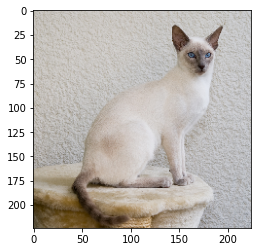

In [6]:
# Cat Species 2
original_image2 = load_img(filename2, target_size=(224,224,3))
print('PIL Image2 Size: {}'.format(original_image2.size))
plt.imshow(original_image2)
plt.show

# convert PIL Image to numpy array
numpy_image2 = img_to_array(original_image2)
# plt.imshow(np.uint8(numpy_image))
# plt.show()
print('Numpy Image2 Size: {}'.format(numpy_image2.shape))

# convert image to batch format by expanding dims at axis=0
image_batch2 = np.expand_dims(numpy_image2, axis=0)
print('Image Batch2 Size: {}'.format(image_batch2.shape))
# plt.imshow(np.uint8(image_batch[0]))
# plt.show()

# ***Predicting Object Class - Cat Breeds***

1.  Image we got in the previous step should be normalized by subtracting the mean of the ImageNet data. This is because the network was trained on the images after this pre-processing

## ***Cat Breed 1 - Lynx***

### ***VGG Model Prediction***

40960/35363 [==================================] - 0s 0us/step


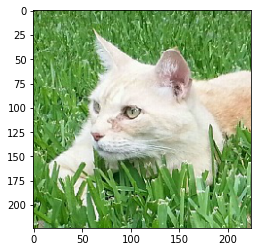

('n02127052', 'lynx', 0.6097531)
('n02123597', 'Siamese_cat', 0.14523153)
('n02124075', 'Egyptian_cat', 0.054158002)
('n02123159', 'tiger_cat', 0.05319829)
('n02123045', 'tabby', 0.015981816)


In [8]:
# prepare the image by preprocessing
processed_image = vgg16.preprocess_input(image_batch.copy())

# get predicted probabilities for each class
predictions = vgg_model.predict(processed_image)

# print predictions
# convert the probabilities to class labels
# we will get top 5 predictions which is the default
label_vgg = decode_predictions(predictions)

plt.imshow(original_image)
plt.show()
# print VGG16 predictions
for prediction_id in range(len(label_vgg[0])):
  print(label_vgg[0][prediction_id])


### ***ResNet50 Model Prediction***

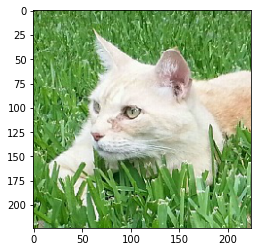

('n02127052', 'lynx', 0.6069706)
('n02123159', 'tiger_cat', 0.10131296)
('n02124075', 'Egyptian_cat', 0.08682997)
('n02119789', 'kit_fox', 0.06338262)
('n02123597', 'Siamese_cat', 0.02193909)


In [7]:
processed_image = resnet50.preprocess_input(image_batch.copy())

predictions = resnet_model.predict(processed_image)

label_resnet = decode_predictions(predictions)

plt.imshow(original_image)
plt.show()

for prediction_id in range(len(label_resnet[0])):
  print(label_resnet[0][prediction_id])

### ***Inception_V3 Model Prediction***

('n02123159', 'tiger_cat', 0.38104853)
('n02124075', 'Egyptian_cat', 0.15025419)
('n02127052', 'lynx', 0.12316737)
('n02123045', 'tabby', 0.09356685)
('n03958227', 'plastic_bag', 0.0077352817)


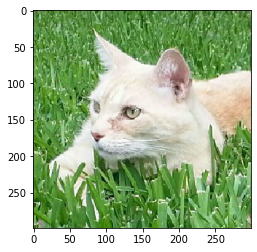

In [8]:
# process image
filename = '/content/cat.jpg'

original_image = load_img(filename, target_size=(299,299))
numpy_image = img_to_array(original_image)
image_batch = np.expand_dims(numpy_image, axis=0)

processed_image = inception_v3.preprocess_input(image_batch.copy())

plt.imshow(np.uint8(numpy_image))

predictions = inception_model.predict(processed_image)

label_inception = decode_predictions(predictions)

for prediction_id in range(len(label_inception[0])):
  print(label_inception[0][prediction_id])

### ***MobileNet Prediction***

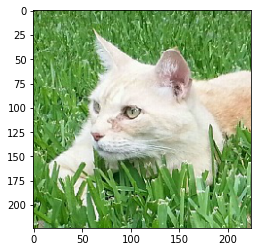

('n02127052', 'lynx', 0.76083606)
('n02328150', 'Angora', 0.058557134)
('n02124075', 'Egyptian_cat', 0.04268683)
('n02123159', 'tiger_cat', 0.041696597)
('n02123045', 'tabby', 0.02168394)


In [9]:
original_image = load_img(filename, target_size=(224,224,3))

# convert PIL Image to numpy array
numpy_image = img_to_array(original_image)

image_batch = np.expand_dims(numpy_image, axis=0)


processed_image = mobilenet.preprocess_input(image_batch.copy())
predictions = mobilenet_model.predict(processed_image)
label_prediction = decode_predictions(predictions)

plt.imshow(original_image)
plt.show()

for prediction_id in range(len(label_prediction[0])):
  print(label_prediction[0][prediction_id])

## ***Cat Breed 2 - Siamese***

### ***VGG Model Prediction***

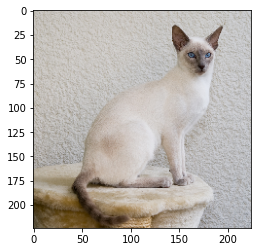

('n02123597', 'Siamese_cat', 0.9977451)


In [12]:
# preprocess_input as per each cnn
processed_image = vgg16.preprocess_input(image_batch2.copy())

# use cnn to make prediction on image
predictions = vgg_model.predict(processed_image)

# generate labels for image
label_vgg_c2 = decode_predictions(predictions)

# show image
plt.imshow(original_image2)
plt.show()

# print labels 
for prediction_id in range(len(label_vgg_c2)):
  print(label_vgg_c2[0][prediction_id])

### ***ResNet50 Model Prediction***

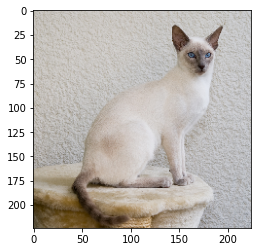

('n02123597', 'Siamese_cat', 0.9777541)
('n02124075', 'Egyptian_cat', 0.013765524)
('n02085620', 'Chihuahua', 0.004294336)
('n02127052', 'lynx', 0.0013462652)
('n02113978', 'Mexican_hairless', 0.00040193376)


In [13]:
processed_image = resnet50.preprocess_input(image_batch2.copy())

predictions = resnet_model.predict(processed_image)

label_resnet_c2 = decode_predictions(predictions)

plt.imshow(original_image2)
plt.show()

for prediction_id in range(len(label_resnet_c2[0])):
  print(label_resnet_c2[0][prediction_id])

### ***MobileNet Prediction***

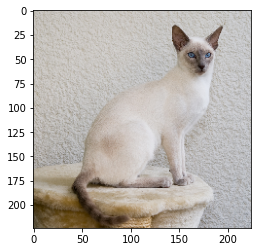

('n02123597', 'Siamese_cat', 0.9743208)
('n02124075', 'Egyptian_cat', 0.013676146)
('n02085620', 'Chihuahua', 0.0058754217)
('n02441942', 'weasel', 0.0015835576)
('n02115641', 'dingo', 0.0005219843)


In [15]:
processed_image = mobilenet.preprocess_input(image_batch2.copy())
predictions = mobilenet_model.predict(processed_image)

label_mobnet_c2 = decode_predictions(predictions)

plt.imshow(original_image2)
plt.show()

for prediction_id in range(len(label_mobnet_c2[0])):
  print(label_mobnet_c2[0][prediction_id])

### ***Inception_V3 Model Prediction***

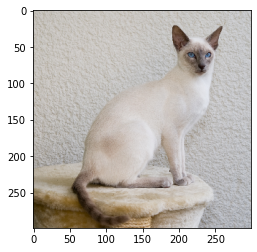

('n02123597', 'Siamese_cat', 0.8954175)
('n02124075', 'Egyptian_cat', 0.012366216)
('n02127052', 'lynx', 0.011051959)
('n02123045', 'tabby', 0.00180774)
('n01877812', 'wallaby', 0.0009860658)


In [16]:
# for inception net, we preprocess image with shape (299,299)
original_image2 = load_img(filename2, target_size=(299,299,3))
numpy_image2 = img_to_array(original_image2)
image_batch2 = np.expand_dims(numpy_image2, axis=0)

# preprocess image
processed_image = inception_v3.preprocess_input(image_batch2.copy())
# generate predictions
predictions = inception_model.predict(processed_image)
# generate prediction labels
label_incept_c2 = decode_predictions(predictions)
# display image
plt.imshow(original_image2)
plt.show()
# print prediction labels and confidence interval
for prediction_id in range(len(label_incept_c2[0])):
  print(label_incept_c2[0][prediction_id])

# ***Predicting Object Class - Dog Breeds***

## ***Load Dog Images and Preprocess***

In [36]:
dog1 = '/content/germansheperd.jpg'
dog2 = '/content/Boxer.1.jpg'

# processing image for ResNet, VGG and MobileNet
original_image = load_img(dog1, target_size=(224,224,3))
numpy_image = img_to_array(original_image)
image_batch = np.expand_dims(numpy_image, axis=0)

original_image2 = load_img(dog2, target_size=(224,224,3))
numpy_image2 = img_to_array(original_image2)
image_batch2 = np.expand_dims(numpy_image2, axis=0)

# Processing image for Inception_V3 which requires size (299,299,3)
original_img_incept1 = load_img(dog1, target_size=(299,299,3))
numpy_image_incept1 = img_to_array(original_img_incept1)
image_batch_incept1 = np.expand_dims(numpy_image_incept1, axis=0)

original_img_incept2 = load_img(dog2, target_size=(299,299,3))
numpy_image_incept2 = img_to_array(original_img_incept2)
image_batch_incept2 = np.expand_dims(numpy_image_incept2, axis=0)

## ***Dog Breed 1 - German Sheperd***

### ***VGG Model Prediction***

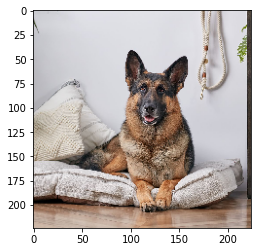

('n02106662', 'German_shepherd', 0.8053555)
('n02105162', 'malinois', 0.07154245)
('n02091467', 'Norwegian_elkhound', 0.041858763)
('n02105412', 'kelpie', 0.018963842)
('n02115641', 'dingo', 0.0116700325)


In [22]:
processed_image = vgg16.preprocess_input(image_batch.copy())
predictions = vgg_model.predict(processed_image)

label_vgg_d1 = decode_predictions(predictions)

plt.imshow(original_image)
plt.show()

for prediction_id in range(len(label_vgg_d1[0])):
  print(label_vgg_d1[0][prediction_id])

### ***ResNet50 Model Prediction***

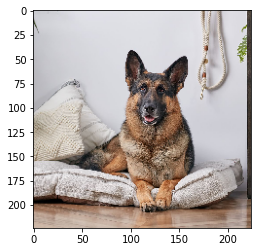

('n02106662', 'German_shepherd', 0.9720615)
('n02105162', 'malinois', 0.024503408)
('n02091467', 'Norwegian_elkhound', 0.0028221747)
('n02105412', 'kelpie', 0.00011446028)
('n03803284', 'muzzle', 8.248661e-05)


In [23]:
processed_image = resnet50.preprocess_input(image_batch.copy())
predictions = resnet_model.predict(processed_image)

label_resnet_d1 = decode_predictions(predictions)

plt.imshow(original_image)
plt.show()

for prediction_id in range(len(label_resnet_d1[0])):
  print(label_resnet_d1[0][prediction_id])

### ***MobileNet Model Prediction***

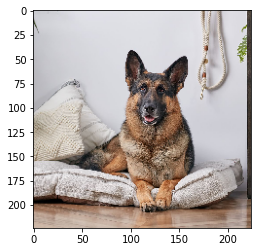

('n02105162', 'malinois', 0.40987822)
('n02106662', 'German_shepherd', 0.38831365)
('n01877812', 'wallaby', 0.16637702)
('n02091467', 'Norwegian_elkhound', 0.014879212)
('n02090379', 'redbone', 0.002127962)


In [25]:
processed_image = mobilenet.preprocess_input(image_batch.copy())
predictions = mobilenet_model.predict(processed_image)

label_mobnet_d1 = decode_predictions(predictions)

plt.imshow(original_image)
plt.show()

for prediction_id in range(len(label_mobnet_d1[0])):
  print(label_mobnet_d1[0][prediction_id])

### ***Inception_V3 Model Prediction***

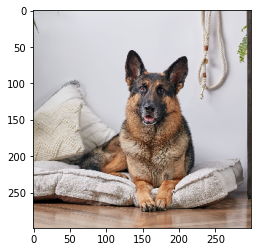

('n02106662', 'German_shepherd', 0.76070863)
('n02105162', 'malinois', 0.10964597)
('n02091467', 'Norwegian_elkhound', 0.009369989)
('n02916936', 'bulletproof_vest', 0.0022846092)
('n02111129', 'Leonberg', 0.001900341)


In [26]:
processed_image = inception_v3.preprocess_input(image_batch_incept1.copy())
predictions = inception_model.predict(processed_image)

label_incept_d1 = decode_predictions(predictions)

plt.imshow(original_img_incept1)
plt.show()

for prediction_id in range(len(label_incept_d1[0])):
  print(label_incept_d1[0][prediction_id])

## ***Dog Breed 2 - Dachshund***

### ***VGG Model Prediction***

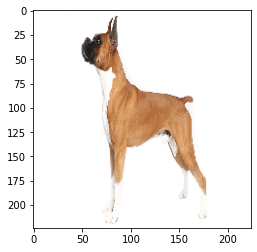

('n02108089', 'boxer', 0.573315)
('n02109047', 'Great_Dane', 0.13666889)
('n02087394', 'Rhodesian_ridgeback', 0.13611116)
('n02110806', 'basenji', 0.035638373)
('n02090379', 'redbone', 0.034628876)


In [37]:
def predict_breed(m_class, m_model, batch_image, image):
  processed_image = m_class.preprocess_input(batch_image.copy())
  predictions = m_model.predict(processed_image)
  labels = decode_predictions(predictions)

  plt.imshow(image)
  plt.show()

  for prediction_id in range(len(labels[0])):
    print(labels[0][prediction_id])


predict_breed(vgg16, vgg_model, image_batch2, original_image2)

### ***ResNet50 Model Prediction***

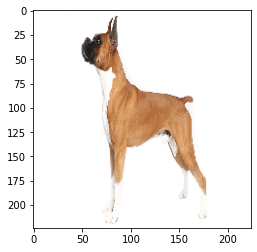

('n02108089', 'boxer', 0.920782)
('n02110806', 'basenji', 0.048615158)
('n02109047', 'Great_Dane', 0.017316524)
('n02087394', 'Rhodesian_ridgeback', 0.0030901362)
('n02093991', 'Irish_terrier', 0.0022599127)


In [38]:
predict_breed(resnet50, resnet_model, image_batch2, original_image2)

### ***MobileNet Model Prediction***

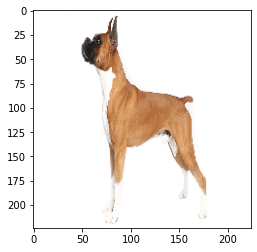

('n02108089', 'boxer', 0.95822597)
('n02110806', 'basenji', 0.023837313)
('n02109047', 'Great_Dane', 0.012219401)
('n02093256', 'Staffordshire_bullterrier', 0.0010961933)
('n02091244', 'Ibizan_hound', 0.0009493314)


In [39]:
predict_breed(mobilenet, mobilenet_model, image_batch2, original_image2)

### ***Inception_V3 Model Prediction***

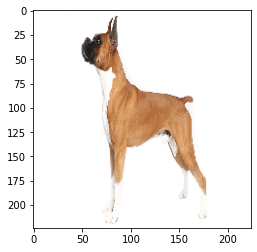

('n02108089', 'boxer', 0.9072515)
('n02110806', 'basenji', 0.009865295)
('n02109047', 'Great_Dane', 0.00841692)
('n02108422', 'bull_mastiff', 0.0024904227)
('n02108915', 'French_bulldog', 0.0017180531)


In [40]:
predict_breed(inception_v3, inception_model, image_batch_incept2, original_image2)